# Data Mining Final Project

**Team Members: Wei Zhang | Lingyi Zheng | Weihong Yang**



Models comparation for forecasting the dying rate in the hospital with heart attacks in adults

## 1 Abstract

This paper analyzes under the situation of the Heart Attack Patients discharged from the hospitals, if demographics factors and the hospital codes are given, could the researcher and the medical personnel forecast the mortality of this patients. To answer this question, we compared the performance of six classification models with Python, using the data of Heart Attack Patients from all of the hospitals in New York State in 1993, including sex, age, diagnosis and length of stay. These pipeline workflows start with ingesting the raw data, preprocessing, training, predicting, visualizing, analyzing, and interpreting the findings. Our result shows that the performance of decision trees model is the best among these classification models. Results also revealed that given the sample groups in the training dataset are unbalanced (9:91), some predictive results from the models might lose their validations. From a safety perspective, we suggest relative personnel should use SMOTE algorithm (Synthetic Minority Oversampling Technique) to equalize the samples groups before traning the data.

## 2 Introduction

Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease were men in 2015. Patients who are suffering a heart attack, but did not have surgery might face a higher likelihood of death. According to the clinical data on Heart Attack Patients discharged from all of the hospitals in New York State in 1993, where the admitting diagnosis was an Acute Myocardial Infarction (AMI), also called a heart attack, who did not have surgery, there are several factors that would influent patients’ death. It would be interesting to see if the factors are given, could medical staff predict the patients’ death reversely. This paper uses different models to compare and discuss which model’s predicted result is more realiable and accuratly, and comes to recommended forecasting for future clinical trial.

## 3 Material and Method

The work methodology aims at understanding the factors related to demographics (sex, age) and hospital codes (diagnosis and length of stay) affecting the dying in the hospital. The statistical analysis was based on Python using existing algorithms and methods of the machine-based data analysis. In this paper, a combination of various approaches has been used in the methodology workflow. The Python language was applied for importing and manipulating the variable data and training different models to visualize the final result.

## 3.1 Collecting data

This dataset is provided by Health Process Management, Doylestown, PA. It contains variables related to demographics (sex, age), variables related to hospital codes (diagnosis, length of stay), variables related to cost (charges) and variables related to mortality (died, DRG). In this experience, we use the training dataset that contains 12,800 observations and 4 numeric variables. We select dying in the hospital (DIED) as our outcome variable, as it captures the correlation between patients’ death and other possible factors that would cause the dying.

## 3.2 Exploring and preparing the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After being preprocessing this data set by Python, 12.8 thousands of data have been shown and they are divided into 10k training data set and 2.8k testing data set randomly for the purpose of traning the models.

In [5]:
import pandas as pd

# Read the CSV file
# heart_attack_data = pd.read_csv("/content/drive/MyDrive/CaseStudy12_ AdultsHeartAttack_Data.csv")
heart_attack_data = pd.read_csv("/content/drive/MyDrive/whole_table.csv")
# Assign the data to the 'data' variable
data = heart_attack_data


In [6]:
import pandas as pd
import numpy as np

data["DIAGNOSIS"] = data["DIAGNOSIS"] - 41001
data["SEX"].replace("F",1,inplace = True)
data["SEX"].replace("M",2,inplace = True)
data = data.drop(["Patient","DRG","CHARGES"],axis = 1)
print(data)

       DIAGNOSIS  SEX  DIED  LOS  AGE
0             40    1     0   10   79
1             40    1     0    6   34
2             90    1     0    5   76
3             80    1     0    2   80
4             90    2     0    1   55
...          ...  ...   ...  ...  ...
12839         40    1     0   14   79
12840         90    1     0    7   91
12841         90    1     0    9   79
12842         50    2     0    5   70
12843         90    2     1    1   81

[12844 rows x 5 columns]


In [7]:
print(data.describe())

          DIAGNOSIS           SEX          DIED           LOS           AGE
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000
mean      58.962161      1.605652      0.109779      7.568670     66.290330
std       31.740089      0.488729      0.312626      5.114986     13.654382
min        0.000000      1.000000      0.000000      0.000000     20.000000
25%       40.000000      1.000000      0.000000      4.000000     57.000000
50%       70.000000      2.000000      0.000000      7.000000     67.000000
75%       90.000000      2.000000      0.000000     10.000000     77.000000
max       90.000000      2.000000      1.000000     38.000000    103.000000


In [8]:
train_samples = 10000
train = data[:train_samples]
test= data[train_samples:]

Then, we take out the column DIED from the training data and keep the rest of the features as train_data variable; we also assign train_died_y variable as the value of column DIED. Therefore, the train_data is the input feature of the training dataset, and the train_died_y is the predict labels of the training dataset. It works as the same as the test_data and the test_died_y, where the test_data is the input feature of the testing dataset and the test_died_y is the predict labels of the testing dataset.

In [9]:
train_data = train.drop('DIED', axis = 1)
train_died_y = np.array(train.loc[:, 'DIED'].values)
test_data = test.drop('DIED', axis = 1)
test_died_y = test.loc[:, 'DIED'].values

## 3.3 Training a model on data

### 3.3.1 Naive Bayes Method:

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics
NB = GaussianNB()
NB.fit(train_data,train_died_y)

GaussianNB()

In [11]:
## GaussianNB(priors=None, var_smoothing=1e-09)

predict_y = NB.predict(test_data)
acc = NB.score(test_data, test_died_y)
m = metrics.confusion_matrix(test_died_y, predict_y)
D_recall = m[1][1]/(m[1][0] + m[1][1])
ND_recall = m[0][0]/(m[0][0] + m[0][1])

print("Test accuracy", acc)

Test accuracy 0.8948663853727145


In [12]:
## Test accuracy 0.86
print("DIED samples recall:",D_recall)

DIED samples recall: 0.026058631921824105


In [13]:
## DIED samples recall: 0.0
print("No DIED samples recall:",ND_recall)

No DIED samples recall: 1.0


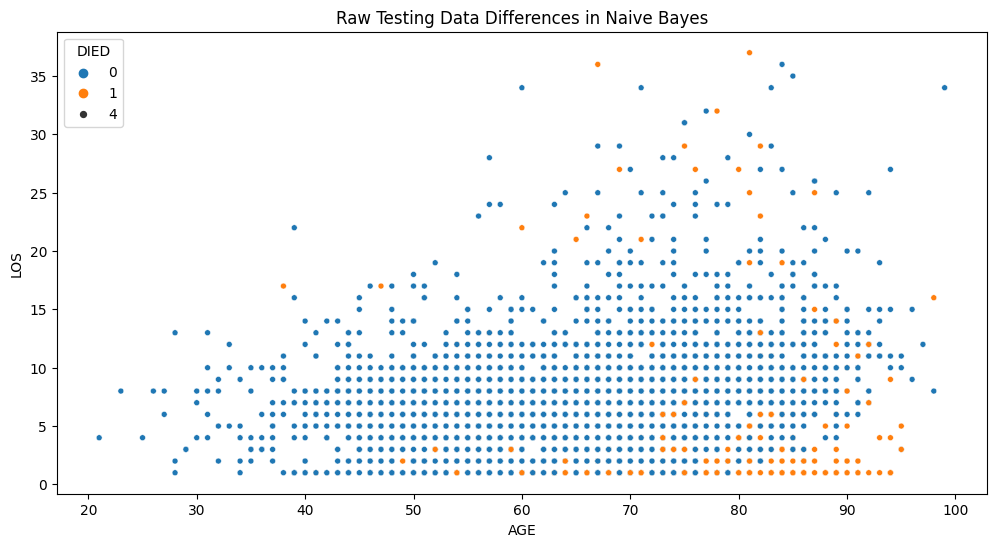

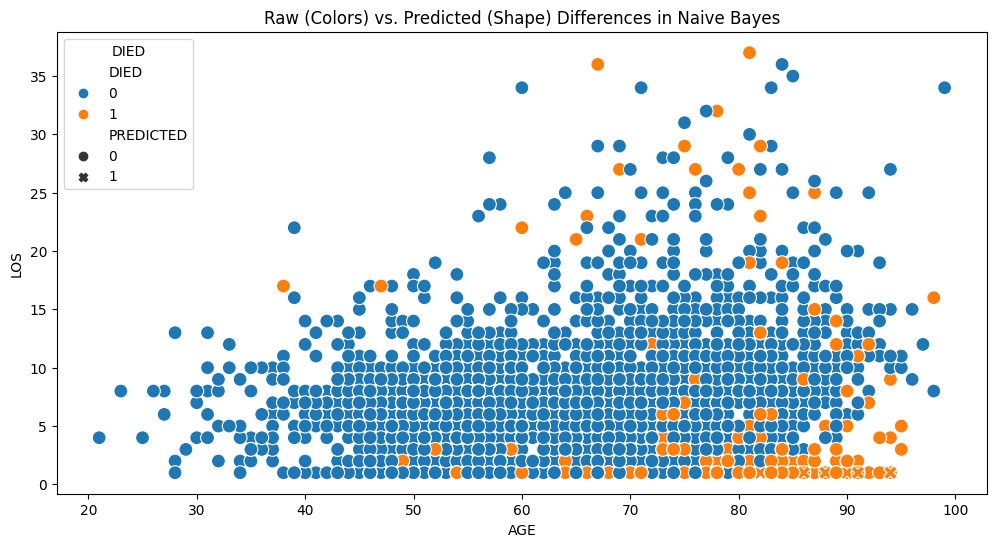

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that you have test_data, test_died_y, and predict_y already defined
test_data_with_died = test_data.copy()
test_data_with_died['DIED'] = test_died_y

# Create the first plot (Raw Testing Data Differences in Naive Bayes)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=test_data_with_died, x='AGE', y='LOS', hue='DIED', size=4)
plt.title("Raw Testing Data Differences in Naive Bayes")
plt.legend(title='DIED')

# Assuming that you have predict_y already defined
test_data_with_predicted = test_data.copy()
test_data_with_predicted['DIED'] = test_died_y
test_data_with_predicted['PREDICTED'] = predict_y

# Create the second plot (Raw (Colors) vs. Predicted (Shape) Differences in Naive Bayes)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=test_data_with_predicted, x='AGE', y='LOS', hue='DIED', style='PREDICTED', s=100)
plt.title("Raw (Colors) vs. Predicted (Shape) Differences in Naive Bayes")
plt.legend(title='DIED')

# Show both plots
plt.show()


* The blue dots are the patients acutally died and the black dots are the patients who still alive.
* Circle means the model’s prediction is correct while the triangles means the model’s prediction is wrong.

* The graph shows that under the Naive Bayes prediction, there is no patients died after leaving the hospital. However, this is not the real case, so it exists bias in Naive Bayes prediction.

### 3.3.2 KNN method

### 3.3.3 Decision Tree Method

### 3.3.4 Logistics Regression Method:

### 3.3.5 Support Vector Machine Method:

### 3.3.6 Nerual Network

## 3.4 Result

## 3.5 Discussion and Improvement

## 3.6 Conclusion

## 3.7 Reference

http://wiki.socr.umich.edu/index.php/SOCR_Data_AMI_NY_1993_HeartAttacks